In [191]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import utility

reload(utility)
from utility import *

from scipy.optimize import curve_fit
from SecondaryValue import SecondaryValue


In [2]:
org_compliance = 0.0098

In [3]:
# a
org_dark = parse_ccurve('../messungen/191114_OM_VB/1_d_org.dat',
                        compliance=org_compliance)
org_light = parse_ccurve('../messungen/191114_OM_VB/1_h_or.dat',
                         compliance=org_compliance)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f922e5a5ac8>)

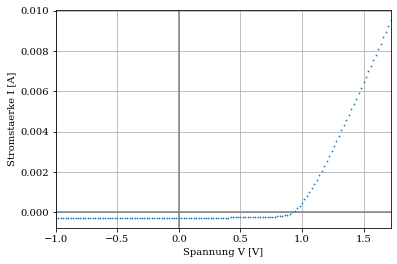

In [4]:
plot_ccurve(org_light)

In [23]:
# anorganic
an_dark = parse_ccurve('../messungen/191114_OM_VB/1_d_an.dat', compliance=.99)
an_light = -1*parse_ccurve('../messungen/191114_OM_VB/1_h_an.dat')[::-1]


In [20]:
plot_ccurve(an_dark, save='A/an_dark_all.pdf')
plot_ccurve(an_light, save='A/an_light_all.pdf')

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9217b88ba8>)

In [167]:
%matplotlib qt5
an_dark_lin = an_dark[90:]

d_i = 0.0001

def lin_rs(x, offset, l):
    return x*l + offset

an_param, an_sigma = curve_fit(lin_rs, an_dark_lin.T[1], an_dark_lin.T[0])
an_sigma = np.sqrt(np.diag(an_sigma))

plt.plot(an_dark.T[1], an_dark.T[0], linestyle='None', marker='x', label='Kennlinie')
plt.ylabel('Spannung [V]')
plt.xlabel('Stromstaerke [A]')
plt.grid()
plt.plot(an_dark_lin[:,1], lin_rs(an_dark_lin[:,1], *an_param), label='Linearer Fit')
plt.legend()

plt.savefig('./figs/A/dark_an_lin_fit.pdf', dpi=300)
R = an_param[0]
R

0.5696984382794336

In [168]:
plt.clf()
plt.ylabel('Spannung [V]')
plt.xlabel('Logarthmus der Stromstaerke')
plt.grid()
an_u, an_i = an_dark[an_dark[:,1] > 0].T
RR=R-0.222
log_i = np.log(an_i)
plt.plot(log_i, an_u - an_i * RR, linestyle='None', marker='x', label='Kennlinie')

p, _ = curve_fit(lin_rs, log_i[30:], (an_u - an_i * RR)[30:])
plt.plot(log_i, lin_rs(log_i,*p))
n = p[1]
i_s = np.exp(-p[0]/p[1])
plt.savefig('./figs/A/dark_an_lin_fit_end.pdf', dpi=300)

In [169]:

def u(x, i, n, RR):
    return n*np.log((x+i)/i) + x*RR
plt.clf()
plt.ylabel('Spannung [V]')
plt.xlabel('Logarthmus der Stromstaerke')
plt.grid()
plt.plot(an_i[10:], an_u[10:], linestyle='None', marker='x', label='Kennlinie')
plt.plot(an_i, u(an_i, i_s, n, RR), label='Fit')
plt.legend()
plt.savefig('./figs/A/dark_an_fit_final.pdf', dpi=300)
p, _ = curve_fit(u, an_i, an_u, p0=[i_s, n, RR])


In [170]:
# Final Parameters
nn = 11804.5221 * n / (273.15 + 32)
nn, i_s, RR

(1.4857909275739798, 9.565465005646108e-08, 0.3476984382794336)

In [193]:
fig, ax = plot_ccurve(an_dark, label='Dunkel')
plot_ccurve_line(ax, an_light, label='Hell', marker='x')
ax.legend()
fig.show()
save_fig(fig, 'A/anorg_hell_dunkel.pdf')